# Excercise 1

## Excercise 1)
### Visualize the data

Domain of flower species

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('irisdata.csv')

# Display unique species names
unique_species = data['species'].unique()
print("Unique species in the dataset:", unique_species)


Unique species in the dataset: ['setosa' 'versicolor' 'virginica']


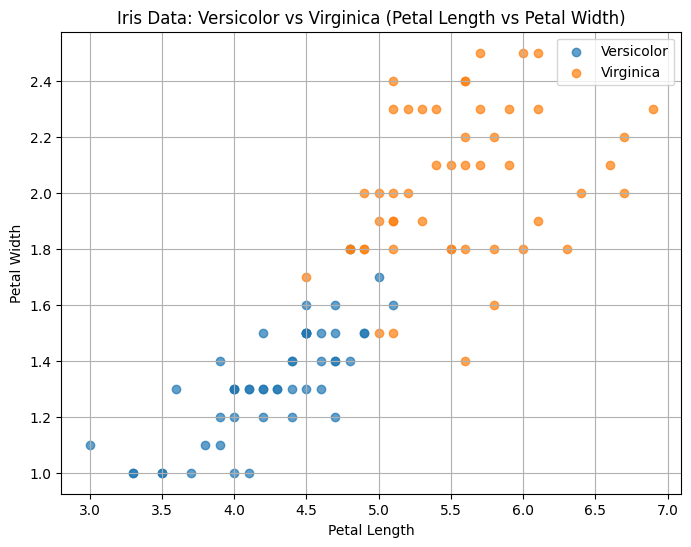

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('irisdata.csv')

# Filter classes 2 and 3 (Versicolor and Virginica)
class_2 = data[data['species'] == 'versicolor']
class_3 = data[data['species'] == 'virginica']

# Extract petal length and width for the two classes
petal_length_class_2 = class_2['petal_length']
petal_width_class_2 = class_2['petal_width']
petal_length_class_3 = class_3['petal_length']
petal_width_class_3 = class_3['petal_width']

# Plot the two classes
plt.figure(figsize=(8, 6))
plt.scatter(petal_length_class_2, petal_width_class_2, label='Versicolor', alpha=0.7)
plt.scatter(petal_length_class_3, petal_width_class_3, label='Virginica', alpha=0.7)

# Add plot details
plt.title('Iris Data: Versicolor vs Virginica (Petal Length vs Petal Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
